In [3]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

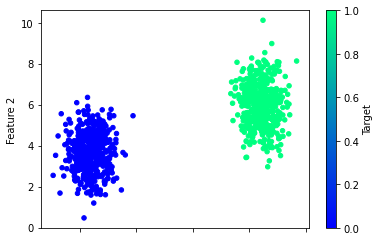

In [5]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DF with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", 'Feature 2'])
df['Target'] = y

# Plotting dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap='winter')

In [6]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the sequential model together and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1000us/step - loss: 0.6815 - accuracy: 0.9760
Epoch 2/100
24/24 [==============================] - 0s 874us/step - loss: 0.6681 - accuracy: 0.9987
Epoch 3/100
24/24 [==============================] - 0s 934us/step - loss: 0.6543 - accuracy: 0.9973
Epoch 4/100
24/24 [==============================] - 0s 918us/step - loss: 0.6399 - accuracy: 0.9960
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.9960
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6095 - accuracy: 0.9960
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.9960
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5778 - accuracy: 0.9960
Epoch 9/100
24/24 [==============================] - 0s 985us/step - loss: 0.5618 - accuracy: 0.9960
Epoch 10/100
24/24 [==============================] - 0s 954us/step - loss: 0.5457 - accuracy: 0.9

24/24 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 913us/step - loss: 0.0931 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 925us/step - loss: 0.0916 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 899us/step - loss: 0.0901 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 1.0000
Epoch 9

<AxesSubplot:>

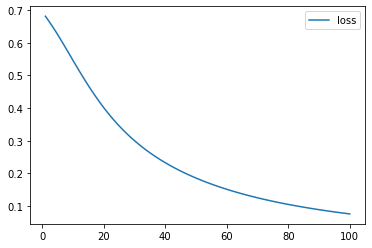

In [15]:
# Create a df containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

# Plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

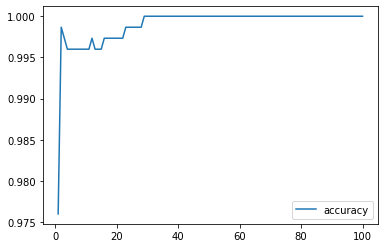

In [16]:
# Plot the accuracy
history_df.plot(y='accuracy')

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f'loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.0761 - accuracy: 1.0000 - 151ms/epoch - 19ms/step
loss: 0.07611211389303207, Accuracy: 1.0


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype('int32')

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## 19.2.4

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

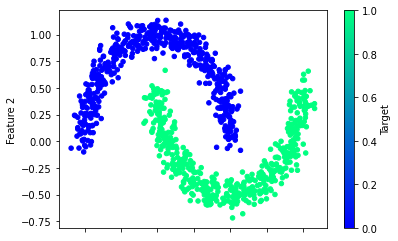

In [19]:
from sklearn.datasets import make_moons

# Create dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a DF to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', "Feature 2"])
df_moons['Target'] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x='Feature 1', y="Feature 2", c='Target', colormap='winter')

In [21]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [23]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2565 - accuracy: 0.4147
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1447 - accuracy: 0.4280
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0637 - accuracy: 0.4373
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0065 - accuracy: 0.4507
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9636 - accuracy: 0.4587
Epoch 6/100
24/24 [==============================] - 0s 984us/step - loss: 0.9294 - accuracy: 0.4627
Epoch 7/100
24/24 [==============================] - 0s 931us/step - loss: 0.9019 - accuracy: 0.4680
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8788 - accuracy: 0.4733
Epoch 9/100
24/24 [==============================] - 0s 940us/step - loss: 0.8586 - accuracy: 0.4800
Epoch 10/100
24/24 [==============================] - 0s 919us/step - loss: 0.8406 - accuracy: 0.4880
E

24/24 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.6880
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.6893
Epoch 84/100
24/24 [==============================] - 0s 956us/step - loss: 0.5379 - accuracy: 0.6893
Epoch 85/100
24/24 [==============================] - 0s 993us/step - loss: 0.5364 - accuracy: 0.6920
Epoch 86/100
24/24 [==============================] - 0s 870us/step - loss: 0.5348 - accuracy: 0.6920
Epoch 87/100
24/24 [==============================] - 0s 921us/step - loss: 0.5334 - accuracy: 0.6933
Epoch 88/100
24/24 [==============================] - 0s 884us/step - loss: 0.5317 - accuracy: 0.6947
Epoch 89/100
24/24 [==============================] - 0s 870us/step - loss: 0.5302 - accuracy: 0.6947
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5286 - accuracy: 0.7013
Epoch 91/100
24/24 [==============================] - 0s 908us/step - loss: 0.5271 - accuracy: 0.7013

<AxesSubplot:>

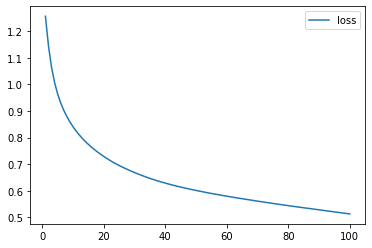

In [24]:
# Create a DF containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history['loss'])+1))

# Plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

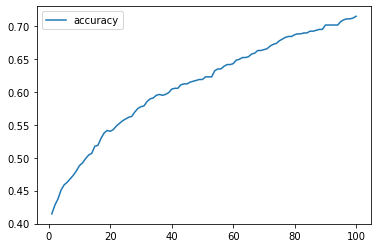

In [25]:
# Plot the accuracy
history_df.plot(y='accuracy')

## 19.2.5

In [26]:
# Generate our new sequential model
new_model = tf.keras.models.Sequential()

In [27]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [28]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 942us/step - loss: 0.5220 - accuracy: 0.8427
Epoch 2/100
24/24 [==============================] - 0s 859us/step - loss: 0.4944 - accuracy: 0.8560
Epoch 3/100
24/24 [==============================] - 0s 851us/step - loss: 0.4691 - accuracy: 0.8667
Epoch 4/100
24/24 [==============================] - 0s 761us/step - loss: 0.4458 - accuracy: 0.8693
Epoch 5/100
24/24 [==============================] - 0s 811us/step - loss: 0.4245 - accuracy: 0.8680
Epoch 6/100
24/24 [==============================] - 0s 872us/step - loss: 0.4046 - accuracy: 0.8733
Epoch 7/100
24/24 [==============================] - 0s 749us/step - loss: 0.3861 - accuracy: 0.8760
Epoch 8/100
24/24 [==============================] - 0s 865us/step - loss: 0.3691 - accuracy: 0.8800
Epoch 9/100
24/24 [==============================] - 0s 888us/step - loss: 0.3532 - accuracy: 0.8827
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy

24/24 [==============================] - 0s 755us/step - loss: 0.2114 - accuracy: 0.9040
Epoch 82/100
24/24 [==============================] - 0s 796us/step - loss: 0.2109 - accuracy: 0.9040
Epoch 83/100
24/24 [==============================] - 0s 696us/step - loss: 0.2105 - accuracy: 0.9040
Epoch 84/100
24/24 [==============================] - 0s 759us/step - loss: 0.2102 - accuracy: 0.9053
Epoch 85/100
24/24 [==============================] - 0s 708us/step - loss: 0.2097 - accuracy: 0.9040
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9040
Epoch 87/100
24/24 [==============================] - 0s 793us/step - loss: 0.2089 - accuracy: 0.9027
Epoch 88/100
24/24 [==============================] - 0s 809us/step - loss: 0.2084 - accuracy: 0.9027
Epoch 89/100
24/24 [==============================] - 0s 963us/step - loss: 0.2081 - accuracy: 0.9040
Epoch 90/100
24/24 [==============================] - 0s 881us/step - loss: 0.2076 - accuracy: 0.